<h1 style="text-align:center;">Classifier non-ANN - Decission Tree</h1>
<p style="font-size:1.5em;">Disusun oleh Kelompok Dendeng</p>
<ol>
    <li style="font-size:1.25em;">Alfian Badrul Isnan (1806148643)</li>
    <li style="color:green;font-size:1.25em;">Farid Muhammad Rahman (1806148662)</li>
    <li style="font-size:1.25em;">Sherly (1806148832)</li>
    <li style="font-size:1.25em;">Alvin Audinata (1806200204)</li>
</ol>

### Pendahuluan
Decision tree adalah salah satu metode klasifikasi yang cukup populer, karena cukup mudah untuk diinterpretasi oleh manusia. Decision tree adalah model prediksi menggunakan struktur pohon atau struktur berhirarki. Konsepnya adalah mengubah data menjadi aturan aturan keputusan. Manfaat utama dari penggunaan decision tree adalah kemampuannya untuk mem-break down proses pengambilan keputusan yang kompleks menjadi lebih simple, sehingga pengambil keputusan akan lebih menginterpretasikan solusi dari permasalahan. Nama lain dari decision tree adalah CART (Classification and Regression Tree). Hal ini dikarenakan metode ini merupakan gabungan dari dua jenis pohon, yaitu classification tree dan juga regression tree.

Berikut ini adalah implementasi algoritma Decision Tree dengan memakai dataset Letter Recognition sesuai pada kesepakatan kelompok.
- Link Dataset : https://archive.ics.uci.edu/ml/datasets/Letter+Recognition
- Sumber : https://archive.ics.uci.edu/

Pengujian dilakukan dengan karakteristik 50% data training & 50% data testing dengan menggunakan 3 Hyperparameter. Kemudian ditambah lagi dengan mekanisme cross-validation dan dilakuan pengujian ulang. Output pengujian adalah dengan memunculkan accuracy / recognition rate pada setiap kelas.

Terlebih dahulu dilakukan import beberapa library yang dibutuhkan dalam notebook ini

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image
from pydot import graph_from_dot_data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import string

In [2]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
def classifier(xtrain, ytrain, xtest, parameters, n_folds, msg):
    dtree = DecisionTreeClassifier(criterion = "gini", 
                                   random_state = 100)
    tree = GridSearchCV(dtree, parameters, 
                        cv=n_folds, 
                       scoring="accuracy",return_train_score=True)
    tree.fit(xtrain, ytrain)
    scores = tree.cv_results_
    plt.figure()
    plt.plot(scores["param_"+msg], 
             scores["mean_train_score"], 
             label="training accuracy")
    plt.plot(scores["param_"+msg], 
             scores["mean_test_score"], 
             label="test accuracy")
    plt.xlabel(msg)
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()
    return tree.predict(xtest)

In [3]:
def caption(df, txt):
    return df.style.set_caption(txt).set_table_styles([dict(selector="caption",
                                                            props=[("text-align", "center"),
                                                                   ("font-size", "150%"),
                                                                   ("font-weight", "bold"),
                                                                   ("color", 'black')])])

In [4]:
def pred_table(res):
    total_rows = len(res)
    columns = ["Class", "Correct", "Total", "Recognition rate (%)"]
    pred_table = pd.DataFrame(columns=columns)
    for alphabet in list(string.ascii_uppercase):
        class_correct = res[(res["Expected"] == alphabet) & (res["Correct?"] == "Correct")]
        class_row_correct = len(class_correct)
        class_total = res[(res["Expected"] == alphabet)]
        class_row_total = len(class_total)
        class_correct_percent = round(class_row_correct * 100 / class_row_total, 2)
        entry = pd.DataFrame([[alphabet, class_row_correct, class_row_total, class_correct_percent]], columns=columns)
        pred_table = pred_table.append(entry)
    return pred_table.reset_index(drop=True)

In [5]:
def generatePred(xtrain, ytrain, xtest, ytest, param, nf, msg):
    pred = classifier(xtrain, ytrain, xtest, param, nf, msg)
    y_pred = pd.DataFrame(pred, columns=["Prediction"])
    y_test = ytest.rename(columns={"letter": "Expected"})
    res = pd.concat([y_pred, y_test], axis='columns')
    res["Correct?"] = np.where(res["Prediction"] == res["Expected"], "Correct", "Incorrect")
    display(caption(res.head(), "Prediction result"))
    export = pred_table(res)
    display(caption(export, "Recognition rate for every class"))
    return export

In [20]:
def recognition_compare_graph(a, b, c, ka, kb, kc):
    pred_table_1= a
    pred_table_2= b
    percent_1 = pred_table_1["Recognition rate (%)"]
    percent_1 = percent_1.rename(ka)
    percent_2 = pred_table_2["Recognition rate (%)"]
    percent_2 = percent_2.rename(kb)
    df_alphabets = pd.DataFrame(list(string.ascii_uppercase))
    pred_table_3= c
    percent_3 = pred_table_3["Recognition rate (%)"]
    percent_3 = percent_3.rename(kc)
    percent = pd.concat([df_alphabets, percent_1, percent_2, percent_3], axis="columns")
    plot = percent.plot.bar(figsize=(18, 7), ylim=[0, 100])
    plot.set(xlabel="Class", xticklabels=list(string.ascii_uppercase), ylabel="Recognition rate (%)")
    return plot

### Tahap Persiapan Data

Selanjutnya adalah memasukan dataset Letter Recognition. Dataset sudah diatur sedemikian rupa sehingga sudah dilakukan normalisasi data untuk menyetarakan jumlah setiap kelasnya dan dilakukan pembersihan data sehingga data yang masuk kedalam program ini sudah dalam keadaan setara dan bebas dari missing values. Normalisasi data dikerjakan pada program dataset_generator.ipynb dengan membentuk sebuah file .xlsx yang memiliki dua worksheet (train dan testing) yang masing masing digunakan untuk data training dan data testing.

In [7]:
train=pd.read_excel(r"..\dataset\dataset.xlsx", sheet_name = 'train').iloc[:,1:]
test=pd.read_excel(r"..\dataset\dataset.xlsx", sheet_name = 'test').iloc[:,1:]

Berikut ini adalah wujud sekilas dari data train dan data test

In [8]:
train.head()

,letter,x-box,y-box,width,height,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,3,6,4,4,2,6,12,2,7,11,9,4,1,11,2,5
1,T,6,8,6,6,3,4,12,3,8,12,10,4,1,10,2,5
2,T,2,1,3,2,1,6,12,3,6,8,11,7,2,11,1,7
3,T,10,14,8,8,4,7,8,3,10,13,6,6,2,9,5,5
4,T,5,10,7,7,8,6,8,4,6,7,6,9,5,8,5,6


In [9]:
test.head()

,letter,x-box,y-box,width,height,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,7,9,8,8,8,6,8,3,9,8,7,9,3,8,8,6
1,T,3,3,4,2,2,6,11,3,7,11,9,5,1,11,3,4
2,T,3,8,5,6,4,6,11,2,7,8,11,8,2,12,1,7
3,T,4,8,5,6,4,6,11,3,7,8,11,8,2,12,1,7
4,T,5,10,7,8,6,6,7,7,7,8,9,8,4,9,7,7


Selanjutnya adalah melakukan pemisahan data antara features yang menjadi variabel bebas dan variabel kontrol. Variabel bebas adalah feature feature yang nilainya akan menentukan hasil prediksi (16 feature [x-box - yegvx]). Sedangkan variabel kontrol adalah feature yang menjadi hasil prediksi yaitu "letter". Masing masing data akan dipisah dan disimpan ke dalam Dataframe yang berbeda.

Sehingga terdapat empat buah Dataframe yang masing masing dua dari train dan dua dari test yakni : xtrain, ytrain, xtest, ytest

In [10]:
xtrain = train.iloc[:,1:]
ytrain = train.iloc[:,:1]
xtest = train.iloc[:,1:]
ytest = train.iloc[:,:1]

Selanjutnya adalah membuat dan melatih instance kelas DecisionTreeClassifer. Kami memberikan nilai y karena model kami menggunakan algoritma supervised machine learning.

Selanjutnya Kita akan melihat actual Decision Tree yang dihasilkan oleh model ini

### Proses Training dan Testing
Decision Tree cukup kompleks dan perlu untuk menyederhanakannya dengan menyetel hyperparameter

Menggunakan Hyperparameters hanya dapat meningkatkan performa dari model yang kita buat agar performa suatu model menjadi lebih akurat.

Hyperparameter yang digunakan adalah :
1. max_depth : Parameter yang menunjukkan kedalaman maksimum pohon. Ini bisa mengambil nilai integer atau None.
2. min_samples_split : Parameter yang menunjukan angka minimal dari samples reqd untuk memisahkan node internal
3. min_samples_leaf : Parameter yang menunjukan jumlah minimum sampel yang diperlukan untuk berada di node daun

Ket : criterion (Gini/IG or entropy) : Parameter yang mendefinisikan fungsi untuk mengukur kualitas dari split. 


#### max_depth

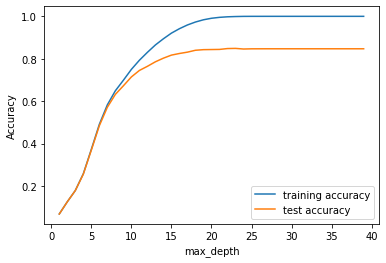

,Prediction,Expected,Correct?
0,T,T,Correct
1,T,T,Correct
2,T,T,Correct
3,T,T,Correct
4,T,T,Correct


,Class,Correct,Total,Recognition rate (%)
0,A,407,407,100.000000
1,B,406,407,99.750000
2,C,407,407,100.000000
3,D,407,407,100.000000
4,E,406,407,99.750000
5,F,406,407,99.750000
6,G,407,407,100.000000
7,H,407,407,100.000000
8,I,407,407,100.000000
9,J,407,407,100.000000


In [11]:
export1A = generatePred(xtrain,ytrain,xtest,ytest,{'max_depth':range(1,40)},5,"max_depth")

#### min_samples_leaf

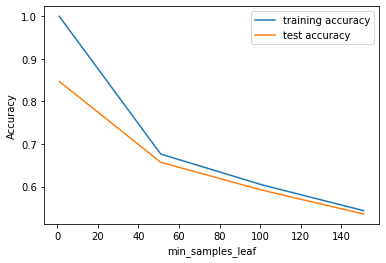

,Prediction,Expected,Correct?
0,T,T,Correct
1,T,T,Correct
2,T,T,Correct
3,T,T,Correct
4,T,T,Correct


,Class,Correct,Total,Recognition rate (%)
0,A,407,407,100.000000
1,B,407,407,100.000000
2,C,407,407,100.000000
3,D,407,407,100.000000
4,E,407,407,100.000000
5,F,407,407,100.000000
6,G,407,407,100.000000
7,H,407,407,100.000000
8,I,407,407,100.000000
9,J,407,407,100.000000


In [12]:
export2A = generatePred(xtrain,ytrain,xtest,ytest,{'min_samples_leaf': range(1, 200, 50)},5,"min_samples_leaf")

#### min_samples_split

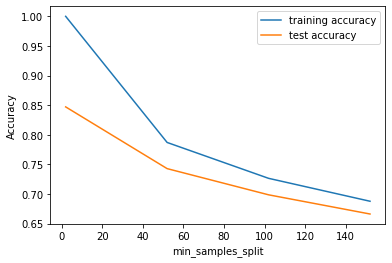

,Prediction,Expected,Correct?
0,T,T,Correct
1,T,T,Correct
2,T,T,Correct
3,T,T,Correct
4,T,T,Correct


,Class,Correct,Total,Recognition rate (%)
0,A,407,407,100.000000
1,B,407,407,100.000000
2,C,407,407,100.000000
3,D,407,407,100.000000
4,E,407,407,100.000000
5,F,407,407,100.000000
6,G,407,407,100.000000
7,H,407,407,100.000000
8,I,407,407,100.000000
9,J,407,407,100.000000


In [13]:
export3A = generatePred(xtrain,ytrain,xtest,ytest,{'min_samples_split': range(2, 200, 50)},5,"min_samples_split")

<AxesSubplot:xlabel='Class', ylabel='Recognition rate (%)'>

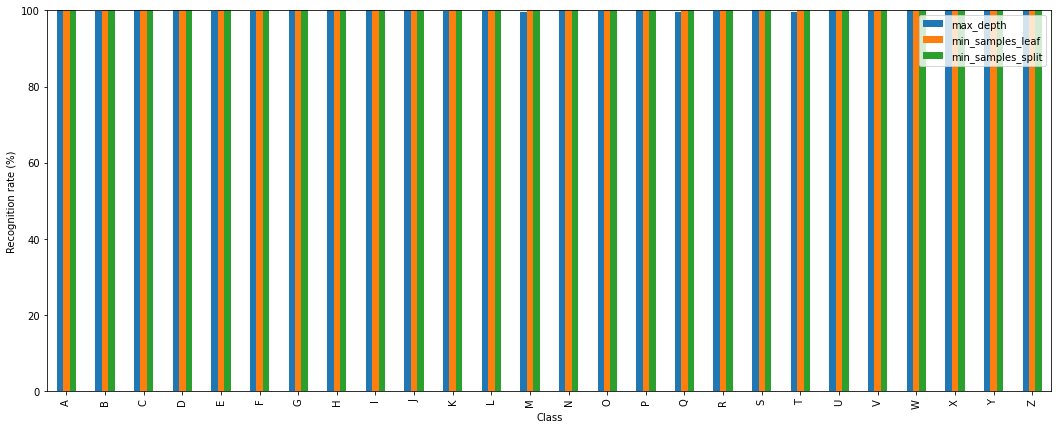

In [28]:
recognition_compare_graph(export1A, export2A, export3A, "max_depth", "min_samples_leaf", "min_samples_split")

### Pertukaran Data Train & Test

#### max_depth

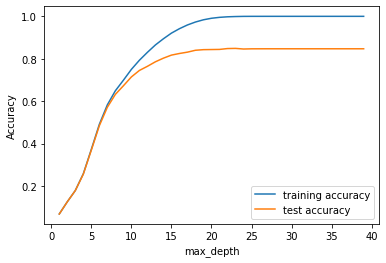

,Prediction,Expected,Correct?
0,T,T,Correct
1,T,T,Correct
2,T,T,Correct
3,T,T,Correct
4,T,T,Correct


,Class,Correct,Total,Recognition rate (%)
0,A,407,407,100.000000
1,B,406,407,99.750000
2,C,407,407,100.000000
3,D,407,407,100.000000
4,E,406,407,99.750000
5,F,406,407,99.750000
6,G,407,407,100.000000
7,H,407,407,100.000000
8,I,407,407,100.000000
9,J,407,407,100.000000


In [22]:
export1B = generatePred(xtest,ytest,xtrain,ytrain,{'max_depth':range(1,40)},5,"max_depth")

#### min_samples_leaf

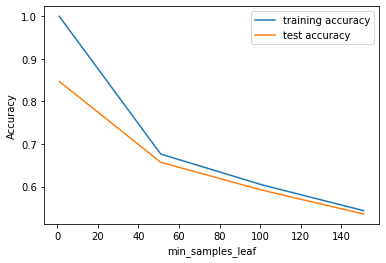

,Prediction,Expected,Correct?
0,T,T,Correct
1,T,T,Correct
2,T,T,Correct
3,T,T,Correct
4,T,T,Correct


,Class,Correct,Total,Recognition rate (%)
0,A,407,407,100.000000
1,B,407,407,100.000000
2,C,407,407,100.000000
3,D,407,407,100.000000
4,E,407,407,100.000000
5,F,407,407,100.000000
6,G,407,407,100.000000
7,H,407,407,100.000000
8,I,407,407,100.000000
9,J,407,407,100.000000


In [23]:
export2B = generatePred(xtest,ytest,xtrain,ytrain,{'min_samples_leaf': range(1, 200, 50)},5,"min_samples_leaf")

#### min_samples_split

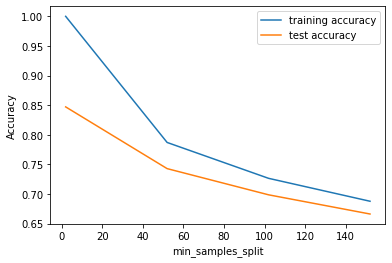

,Prediction,Expected,Correct?
0,T,T,Correct
1,T,T,Correct
2,T,T,Correct
3,T,T,Correct
4,T,T,Correct


,Class,Correct,Total,Recognition rate (%)
0,A,407,407,100.000000
1,B,407,407,100.000000
2,C,407,407,100.000000
3,D,407,407,100.000000
4,E,407,407,100.000000
5,F,407,407,100.000000
6,G,407,407,100.000000
7,H,407,407,100.000000
8,I,407,407,100.000000
9,J,407,407,100.000000


In [24]:
export3B = generatePred(xtest,ytest,xtrain,ytrain,{'min_samples_split': range(2, 200, 50)},5,"min_samples_split")

<AxesSubplot:xlabel='Class', ylabel='Recognition rate (%)'>

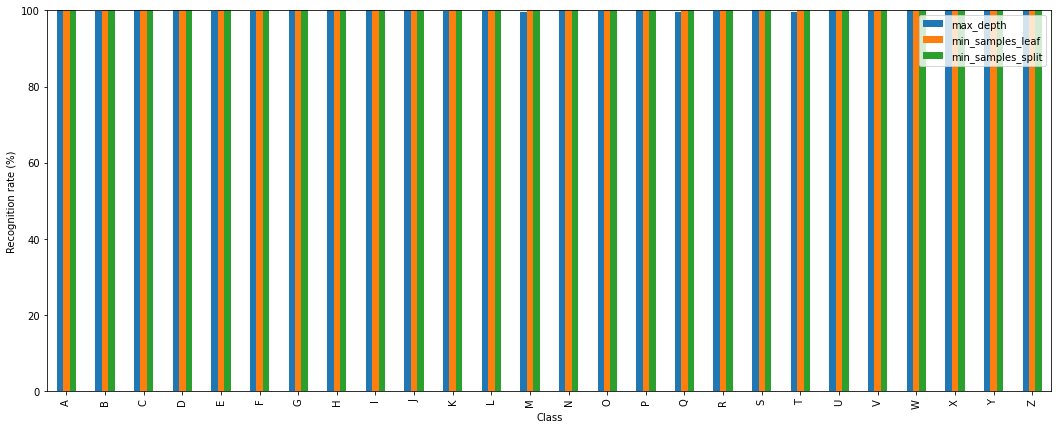

In [27]:
recognition_compare_graph(export1B, export2B, export3B, "max_depth", "min_samples_leaf", "min_samples_split")

In [26]:
import os
from openpyxl import Workbook
from openpyxl import load_workbook
filename = r'../export/export.xlsx'
sheets={
    'name':['DT-Normal(max_depth)','DT-Normal(min_sample_leaf)','DT-Normal(min_sample_split)','DT-Swapped(max_depth)','DT-Swapped(min_sample_leaf)','DT-Swapped(min_sample_split)'],
    'sheet':[export1A,export2A,export3A,export1B,export2B,export3B],
}

if os.path.exists(filename):
    book = load_workbook(filename)
    sheetnames = []
    for i in book.sheetnames:
        if i in sheets['name']:
            book.remove(book[i])
    writer = pd.ExcelWriter(filename,engine="openpyxl")
    writer.book = book
else:
    writer = pd.ExcelWriter(filename,engine="openpyxl")

for i in range(len(sheets['sheet'])):
    sheets['sheet'][i].to_excel(writer, sheet_name=sheets['name'][i], index=False, freeze_panes=[1, 0])

writer.save()
writer.close()

#### Referensi : 
- https://towardsdatascience.com/decision-tree-in-python-b433ae57fb93
- https://github.com/venkatesh2022/Decision-Tree-to-predict-Income
- https://medium.com/iykra/mengenal-decision-tree-dan-manfaatnya-b98cf3cf6a8d